# Testing Lamian non-alignment method on our simulated dataset

Below scripts are used to first test the Lamian tutorial on their given dataset, and then go into testing it on our simulated datasets that have non-DE genes (all matching genes), and DE genes (with divergence and convergence patterns) along time.

**Reference:** 
Hou, W., Ji, Z., Chen, Z., Wherry, E.J., Hicks, S.C. and Ji, H., 2023. A statistical framework for differential pseudotime analysis with multiple single-cell RNA-seq samples. Nature communications, 14(1), p.7286. 
https://winnie09.github.io/Wenpin_Hou/pages/Lamian.html

# 1. Testing Lamian on their given dataset 

In [1]:
suppressMessages(library(Lamian))
data(expdata)
#head(expdata$expr) 
#max(expdata$expr) 
#expdata$cellanno
#print(expdata$design)

Warning message:
“replacing previous import ‘circlize::degree’ by ‘igraph::degree’ when loading ‘Lamian’”
Warning message:
“replacing previous import ‘igraph::%s%’ by ‘matrixcalc::%s%’ when loading ‘Lamian’”
Warning message:
“replacing previous import ‘ComplexHeatmap::pheatmap’ by ‘pheatmap::pheatmap’ when loading ‘Lamian’”
Warning message:
“replacing previous import ‘Matrix::cov2cor’ by ‘stats::cov2cor’ when loading ‘Lamian’”
Warning message:
“replacing previous import ‘igraph::decompose’ by ‘stats::decompose’ when loading ‘Lamian’”
Warning message:
“replacing previous import ‘Matrix::toeplitz’ by ‘stats::toeplitz’ when loading ‘Lamian’”
Warning message:
“replacing previous import ‘Matrix::update’ by ‘stats::update’ when loading ‘Lamian’”
Warning message:
“replacing previous import ‘igraph::spectrum’ by ‘stats::spectrum’ when loading ‘Lamian’”
Warning message:
“replacing previous import ‘grid::depth’ by ‘topGO::depth’ when loading ‘Lamian’”
Warning message:
“replacing previous import 

In [2]:
print(expdata$design) # original design in the data by Lamian test

    intercept group
BM1         1     1
BM2         1     1
BM3         1     0
BM4         1     0
BM5         1     1
BM6         1     1
BM7         1     0
BM8         1     0


## Including 2 samples in one covariate group and 1 sample in the other covaraite group

,intercept,group
BM2,1,1
BM3,1,0
BM4,1,0


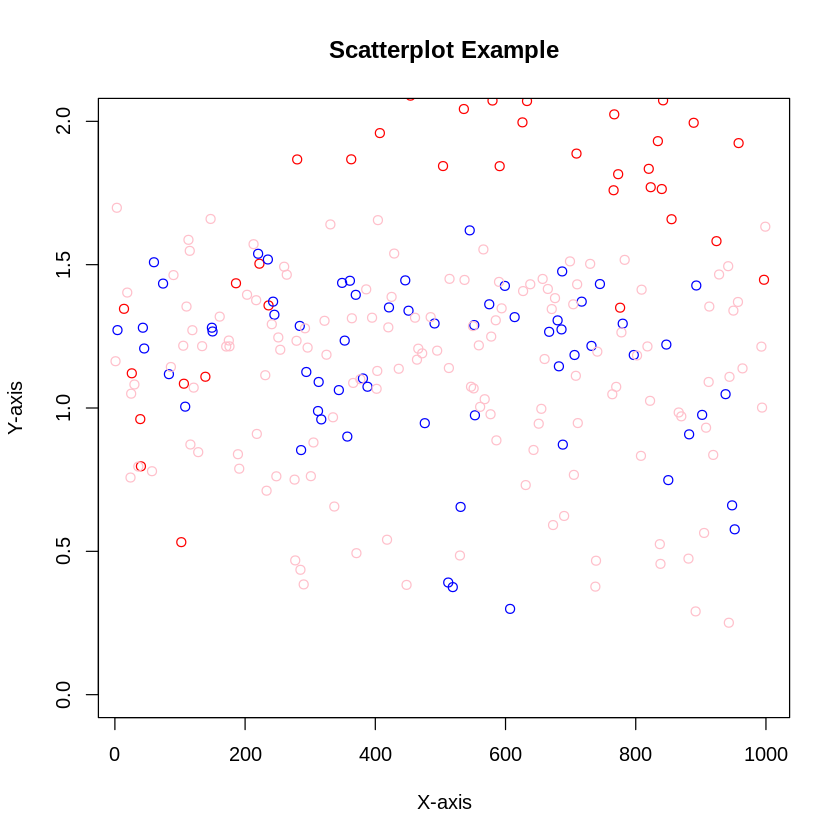

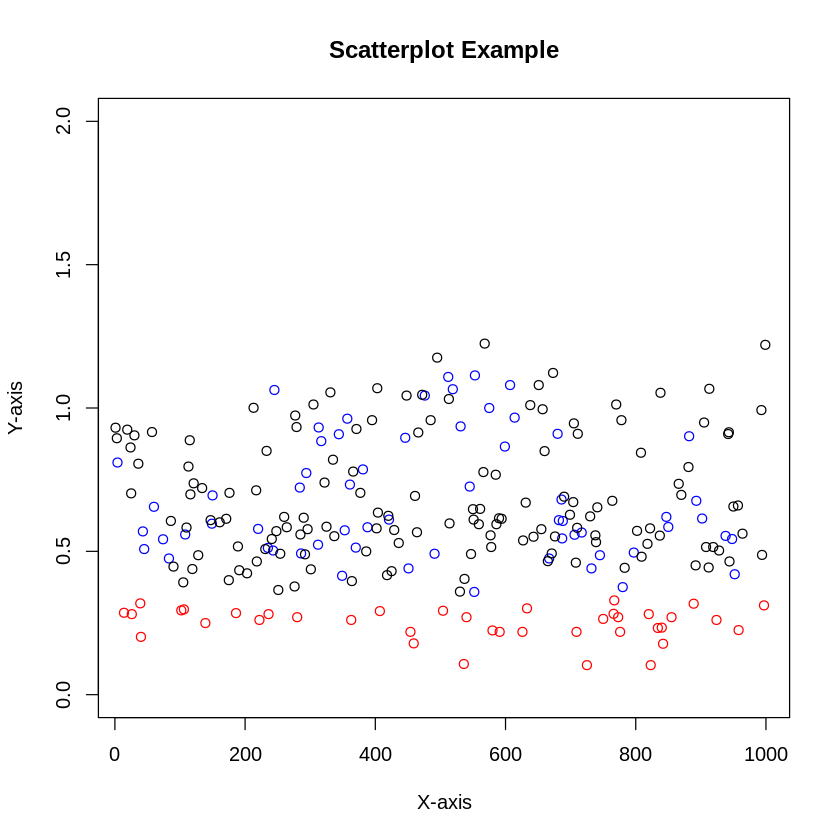

In [3]:
#expdata$cellanno
# Specify the substring to filter by
temp <- expdata$expr
substrings_to_filter <- c("BM2:", "BM3:", "BM4:")
# Find column indices that start with the specified substring
matching_columns <- grep(paste0("^", substrings_to_filter, collapse = "|"), colnames(temp))
temp <- temp[, matching_columns]

temp_design <- expdata$design
substrings_to_filter = c("BM2", "BM3", "BM4")
matching_rows <- grepl(paste0("^", substrings_to_filter, collapse = "|"), rownames(temp_design)) 
temp_design <- temp_design[matching_rows,]
temp_design

temp_cellanno <- expdata$cellanno
matching_rows <- grepl(paste0("^", substrings_to_filter, collapse = "|"), temp_cellanno$Cell)
temp_cellanno <- temp_cellanno [matching_rows,]

temp_pseudotime <- expdata$pseudotime
matching_names <- grep(paste0("^", substrings_to_filter, collapse = "|"), names(temp_pseudotime), value = TRUE)
temp_pseudotime <- temp_pseudotime[matching_names]

substrings_to_filter <- c("BM2:")
# Find column indices that start with the specified substring
matching_columns <- grep(paste0("^", substrings_to_filter, collapse = "|"), colnames(temp))
S <- temp[, matching_columns]

matching_names <- grep(paste0("^", substrings_to_filter, collapse = "|"), names(temp_pseudotime), value = TRUE)
S_pseudotime <- temp_pseudotime[matching_names]

substrings_to_filter <- c("BM3:")
# Find column indices that start with the specified substring
matching_columns <- grep(paste0("^", substrings_to_filter, collapse = "|"), colnames(temp))
T <- temp[, matching_columns]

matching_names <- grep(paste0("^", substrings_to_filter, collapse = "|"), names(temp_pseudotime), value = TRUE)
T_pseudotime <- temp_pseudotime[matching_names]

substrings_to_filter <- c("BM4:")
# Find column indices that start with the specified substring
matching_columns <- grep(paste0("^", substrings_to_filter, collapse = "|"), colnames(temp))
Z <- temp[, matching_columns]

matching_names <- grep(paste0("^", substrings_to_filter, collapse = "|"), names(temp_pseudotime), value = TRUE)
Z_pseudotime <- temp_pseudotime[matching_names]

plot(S_pseudotime, S['HLA-DMB',], main = "Scatterplot Example", xlab = "X-axis", ylab = "Y-axis", col='red',ylim = c(0, 2))
points(T_pseudotime, T['HLA-DMB',], main = "Scatterplot Example", xlab = "X-axis", ylab = "Y-axis", col='blue')
points(Z_pseudotime, Z['HLA-DMB',], main = "Scatterplot Example", xlab = "X-axis", ylab = "Y-axis", col='pink')
#plot(Q_time, expr_Q['Gene560',], main = "Scatterplot Example", xlab = "X-axis", ylab = "Y-axis")

plot(S_pseudotime, S['ACOT8',], main = "Scatterplot Example", xlab = "X-axis", ylab = "Y-axis", col='red',ylim = c(0, 2))
points(T_pseudotime, T['ACOT8',], main = "Scatterplot Example", xlab = "X-axis", ylab = "Y-axis", col='blue')
points(Z_pseudotime, Z['ACOT8',], main = "Scatterplot Example", xlab = "X-axis", ylab = "Y-axis", col='black')

In [4]:
Res <- lamian_test(
  expr = temp,
  cellanno = temp_cellanno,
  pseudotime = temp_pseudotime,
  design = temp_design,
  test.type = 'variable',
  testvar = 2,
  permuiter = 5,
  ## This is for permutation test only. 
  ## We suggest that users use default permuiter = 100.
  ## Alternatively, we can use test.method = 'chisq' to swich to the chi-square test.
  ncores = 1
)


In [5]:
stat <- Res$statistics
stat <- stat[order(stat[, 1],-stat[, 3]),]
## identify XDE genes with FDR.overall < 0.05 cutoff
diffgene <-
  rownames(stat[stat[, grep('^fdr.*overall$', colnames(stat))] < 0.05, ])
length(diffgene)

# 89 DE genes detected

[1] 89

## Testing all samples as originally given in the tutorial

In [7]:
Res$statistics

Res <- lamian_test(
  expr = expdata$expr,
  cellanno = expdata$cellanno,
  pseudotime = expdata$pseudotime,
  design = expdata$design,
  test.type = 'variable',
  testvar = 2,
  permuiter = 5,
  ## This is for permutation test only. 
  ## We suggest that users use default permuiter = 100.
  ## Alternatively, we can use test.method = 'chisq' to swich to the chi-square test.
  ncores = 1
)

stat <- Res$statistics
stat <- stat[order(stat[, 1],-stat[, 3]),]
## identify XDE genes with FDR.overall < 0.05 cutoff
diffgene <-
  rownames(stat[stat[, grep('^fdr.*overall$', colnames(stat))] < 0.05, ])
length(diffgene)

,fdr.overall,pval.overall,z.overall,log.pval.overall,fdr.meanDiff,pval.meanDiff,z.meanDiff,log.pval.meanDiff,fdr.trendDiff,pval.trendDiff,z.trendDiff,log.pval.trendDiff
TPM4,8.692362e-01,7.967999e-01,-0.2328257,-9.548722e-47,NA,NA,NA,NA,NA,NA,NA,NA
HLA-DMB,1.913024e-93,1.434768e-94,4.7086276,-2.144726e+02,6.015695e-02,4.123117e-02,1.949318509,-1.820089e+00,2.574154e-02,1.185846e-02,2.2210805,-3.198810e+00
KHSRP,8.276360e-03,5.862422e-03,2.3406809,-3.709993e+00,4.030909e-148,2.717467e-149,13.138079789,-3.404761e+02,8.215502e-01,6.277013e-01,-0.2005507,-3.868274e-04
ACER3,7.020716e-231,1.755179e-232,15.4438776,-5.320277e+02,5.401714e-02,3.641605e-02,2.050931370,-1.703584e+00,6.927659e-06,2.257327e-06,3.9312271,-1.180392e+01
TMEM14A,0.000000e+00,0.000000e+00,5.5223918,-1.946808e+03,1.312721e-297,5.899871e-299,10.275604564,-6.850886e+02,1.360470e-01,7.337366e-02,1.1982161,-1.025622e+00
FAM168B,3.343199e-04,2.200940e-04,3.1598759,-6.902444e+00,2.656716e-01,2.000000e-01,1.104108522,0.000000e+00,1.647541e-08,4.257691e-09,4.7477752,-1.767025e+01
SETD9,7.378421e-05,4.488539e-05,3.4475123,-8.447528e+00,9.999959e-01,9.999959e-01,-3.826212139,-1.580975e-15,9.362289e-05,3.576605e-05,2.9201544,-8.629074e+00
EXOC2,2.031888e-01,1.591646e-01,1.2156524,-2.366355e-01,NA,NA,NA,NA,NA,NA,NA,NA
UCA1,6.075686e-04,4.151719e-04,3.0740266,-6.785391e+00,7.363443e-01,6.767587e-01,-0.624802145,-6.876538e-04,5.297192e-07,1.547494e-07,3.5790578,-1.407202e+01
CEP57,4.574422e-78,4.574422e-79,12.8143644,-1.787743e+02,2.416028e-15,8.143915e-16,4.808031183,-3.313465e+01,3.943622e-02,1.905345e-02,1.7892861,-2.371951e+00


[1] 99

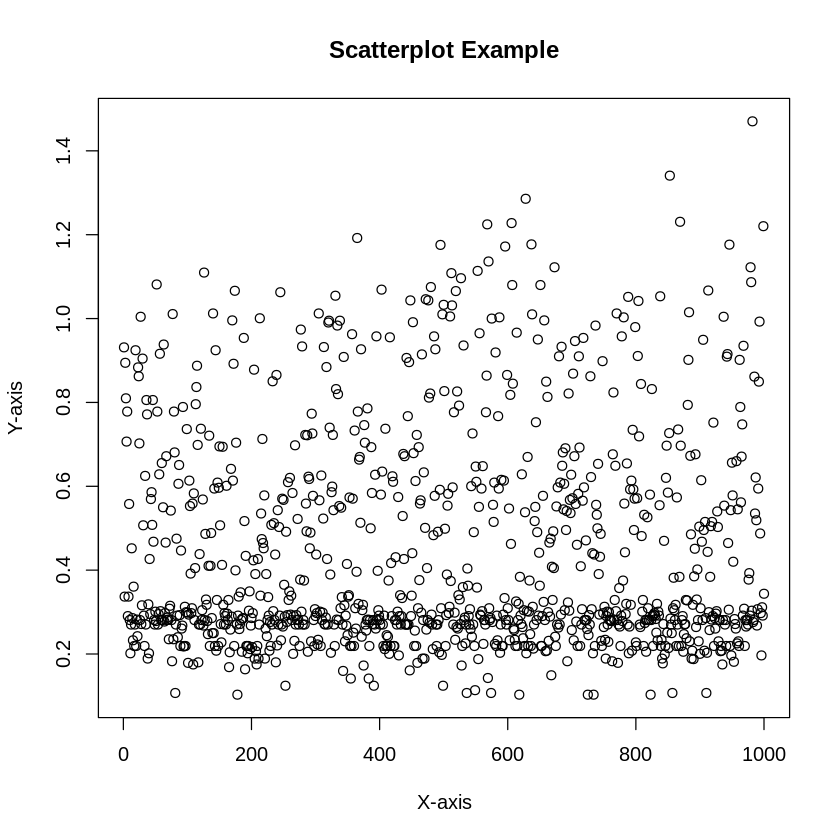

In [8]:
plot(expdata$pseudotime, expdata$expr['ACOT8',], main = "Scatterplot Example", xlab = "X-axis", ylab = "Y-axis")
#plot(Q_time, expr_Q['Gene560',], main = "Scatterplot Example", xlab = "X-axis", ylab = "Y-axis")

## Including 1 sample in one covariate group and 1 sample in the other covaraite group [The case relevant for us]

,intercept,group
BM2,1,1
BM3,1,0


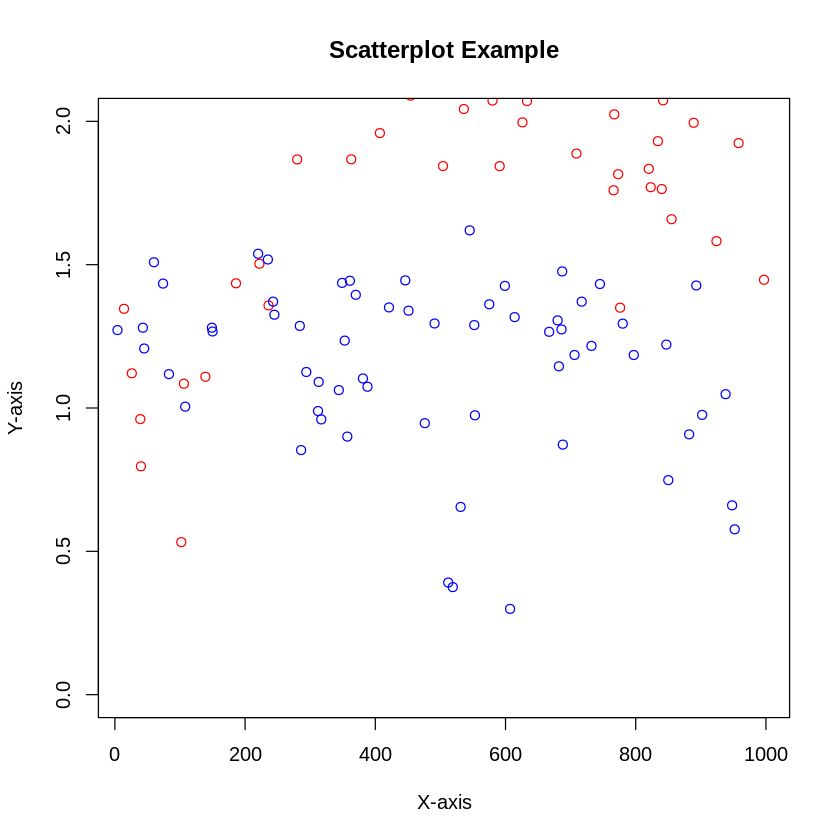

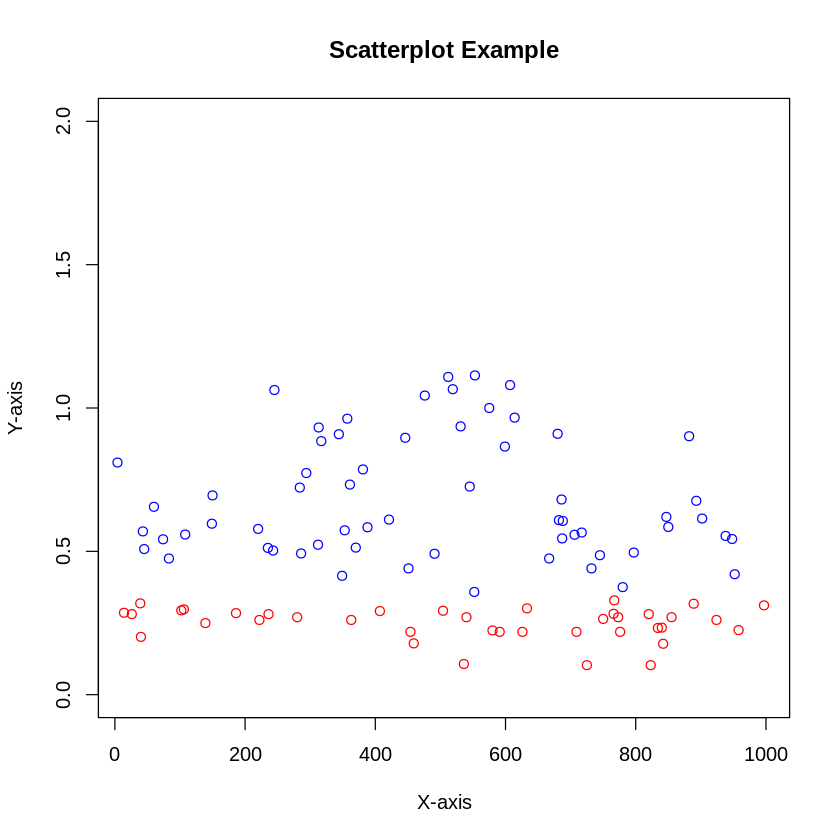

In [9]:
#expdata$cellanno
# Specify the substring to filter by
temp <- expdata$expr
substrings_to_filter <- c("BM2:", "BM3:")
# Find column indices that start with the specified substring
matching_columns <- grep(paste0("^", substrings_to_filter, collapse = "|"), colnames(temp))
temp <- temp[, matching_columns]

temp_design <- expdata$design
substrings_to_filter = c("BM2", "BM3")
matching_rows <- grepl(paste0("^", substrings_to_filter, collapse = "|"), rownames(temp_design)) 
temp_design <- temp_design[matching_rows,]
temp_design

temp_cellanno <- expdata$cellanno
matching_rows <- grepl(paste0("^", substrings_to_filter, collapse = "|"), temp_cellanno$Cell)
temp_cellanno <- temp_cellanno [matching_rows,]

temp_pseudotime <- expdata$pseudotime
matching_names <- grep(paste0("^", substrings_to_filter, collapse = "|"), names(temp_pseudotime), value = TRUE)
temp_pseudotime <- temp_pseudotime[matching_names]

substrings_to_filter <- c("BM2:")
# Find column indices that start with the specified substring
matching_columns <- grep(paste0("^", substrings_to_filter, collapse = "|"), colnames(temp))
S <- temp[, matching_columns]

matching_names <- grep(paste0("^", substrings_to_filter, collapse = "|"), names(temp_pseudotime), value = TRUE)
S_pseudotime <- temp_pseudotime[matching_names]

substrings_to_filter <- c("BM3:")
# Find column indices that start with the specified substring
matching_columns <- grep(paste0("^", substrings_to_filter, collapse = "|"), colnames(temp))
T <- temp[, matching_columns]

matching_names <- grep(paste0("^", substrings_to_filter, collapse = "|"), names(temp_pseudotime), value = TRUE)
T_pseudotime <- temp_pseudotime[matching_names]

plot(S_pseudotime, S['HLA-DMB',], main = "Scatterplot Example", xlab = "X-axis", ylab = "Y-axis", col='red',ylim = c(0, 2))
points(T_pseudotime, T['HLA-DMB',], main = "Scatterplot Example", xlab = "X-axis", ylab = "Y-axis", col='blue')
#points(Z_pseudotime, Z['HLA-DMB',], main = "Scatterplot Example", xlab = "X-axis", ylab = "Y-axis", col='pink')
#plot(Q_time, expr_Q['Gene560',], main = "Scatterplot Example", xlab = "X-axis", ylab = "Y-axis")

plot(S_pseudotime, S['ACOT8',], main = "Scatterplot Example", xlab = "X-axis", ylab = "Y-axis", col='red',ylim = c(0, 2))
points(T_pseudotime, T['ACOT8',], main = "Scatterplot Example", xlab = "X-axis", ylab = "Y-axis", col='blue')

In [11]:
temp_design

,intercept,group
BM2,1,1
BM3,1,0


In [12]:
Res <- lamian_test(
  expr = temp,
  cellanno = temp_cellanno,
  pseudotime = temp_pseudotime,
  design = temp_design,
  test.type = 'variable',
  testvar = 2,
  permuiter = 5,
  ## This is for permutation test only. 
  ## We suggest that users use default permuiter = 100.
  ## Alternatively, we can use test.method = 'chisq' to swich to the chi-square test.
  ncores = 1
)
stat <- Res$statistics
stat <- stat[order(stat[, 1],-stat[, 3]),]
## identify XDE genes with FDR.overall < 0.05 cutoff
diffgene <-
  rownames(stat[stat[, grep('^fdr.*overall$', colnames(stat))] < 0.05, ])
length(diffgene) 

[1] 0

### No DE genes output -- even for obviously DE genes like ACOT8, HLA-DMB as evident from the above plots

# 2. Testing our simulated datasets for DE using Lamian non-alignment method

In [14]:
#expdata$pseudotime
#expr
library(r2r)

In [15]:
R = sceasy::convertFormat('../[G2G]New_scripts/SimulationData/adata_all_ref.h5ad', from="anndata", to="seurat")
Q = sceasy::convertFormat('../[G2G]New_scripts/SimulationData/adata_all_query.h5ad', from="anndata", to="seurat")
R_data = R@assays$RNA@data
Q_data = Q@assays$RNA@data
R_time = R$time
Q_time = Q$time

Loading required namespace: Seurat

X -> counts

X -> counts



In [16]:
patterns = unique(R@assays$RNA@meta.features$gene_pattern) 
m = hashmap()
RIDs = c()
QIDs = c()
for (pattern in patterns){
    
    Rid = paste('R_',pattern, sep = '')
    Qid = paste('Q_',pattern, sep='') 
    m[[Rid]] = R[rownames(subset(R@assays$RNA@meta.features, gene_pattern == pattern  ))]
    m[[Qid]] = Q[rownames(subset(Q@assays$RNA@meta.features, gene_pattern == pattern  ))]
    RIDs = append(RIDs, Rid)
    QIDs = append(QIDs, Qid)
    
}

### As shown in the first section, Lamian seems to be not working for a design where there is only 1 sample per covariate group... 
i.e. We tested this using their own dataset, filtering BM2 and BM3 under group 0 and 1 which generated no XDE genes for clearly DE ones. But when we included BM4 as well, it started to give out XDE genes. 
### So we are doing a hack -- let's replicate the same R and Q in our dataset as second samples under each group and then run the test (theoretically this should not create any bias becauase we are just duplicating the current samples). 

### Then we tested R and Q gene pairs in each pattern group and found that for the non-DE dataset, it generated 288/500 false positive DEs. 

 288/500 # are DE genes (False positive) in the matched dataset according to Lamian test
 
 div05 # 500 DE genes as expected
 
 div25 # 500 DE genes as expected
 
 div75 # 500 DE genes as expected
 
 con05 #  500 DE genes as expected
 
 con25 # 500 DE gnees as expected

In [17]:
RIDs
QIDs

i=4
RID = RIDs[i]
QID = QIDs[i]

print(RID)
print(QID)

suppressMessages(library(Lamian))

gex_mat_R <- m[[RID]]@assays$RNA@data
gex_mat_Q <- m[[QID]]@assays$RNA@data
#expr_R = as.data.frame(gex_mat_R )
#expr_Q = as.data.frame(gex_mat_Q )
expr_R  <- cbind(as.data.frame(gex_mat_R), as.data.frame(gex_mat_R )) # hack -- duplicating R sample
expr_Q <- cbind(as.data.frame(gex_mat_Q), as.data.frame(gex_mat_Q )) # hack -- duplicating Q sample

#R_cellnames = paste( 'Ref:',colnames(m[[RID]]@assays$RNA@data), sep='')
#Q_cellnames = paste( 'Query:',colnames(m[[QID]]@assays$RNA@data), sep='')
R_cellnames =c(paste( 'Ref1:',colnames(m[[RID]]@assays$RNA@data), sep=''),paste( 'Ref2:',colnames(m[[RID]]@assays$RNA@data), sep='')) # hack
Q_cellnames =c(paste( 'Query1:',colnames(m[[RID]]@assays$RNA@data), sep=''),paste( 'Query2:',colnames(m[[RID]]@assays$RNA@data), sep='')) # hack

colnames(expr_R) = R_cellnames
colnames(expr_Q) = Q_cellnames

cellanno <- data.frame( Cell =  c(R_cellnames, Q_cellnames) , 
                       Sample=c(replicate(dim(gex_mat_R) [2], "Ref1"), 
                                replicate(dim(gex_mat_R) [2], "Ref2"), 
                                replicate(dim(gex_mat_Q) [2], "Query1"),
                                replicate(dim(gex_mat_Q) [2], "Query2")
                               ) ) 
dim(expr_Q)
dim(expr_R)
expr <- cbind(expr_R,expr_Q)

#R_time = m[[RIDs[1]]]$time
#Q_time = m[[QIDs[1]]]$time
R_time = c(m[[RIDs[1]]]$time,m[[RIDs[1]]]$time) # hack
Q_time = c(m[[QIDs[1]]]$time,m[[QIDs[1]]]$time) # hack

names(R_time)  = R_cellnames
names(Q_time)  = Q_cellnames

pseudotime <- c(R_time, Q_time) 
temp <- pseudotime #as.integer(pseudotime * 1000) 
names(temp) <- names(pseudotime)
pseudotime <- temp
#pseudotime
#pseudotime

temp <- matrix(c(1,1,1,1,1,0,1,0), ncol = 2, byrow = TRUE)
row.names(temp) = c('Ref1','Ref2','Query1','Query2')
colnames(temp) = c('intercept','group')
design <- temp
#design

expr <- expr - min(expr)
expr<-as.matrix(expr)
Res <- lamian_test(
  expr = as.matrix(expr) ,
  cellanno = cellanno,
  pseudotime = pseudotime,
  design = design,
  test.type = 'variable',
  testvar = 2,
  permuiter = 5,
  ## This is for permutation test only. 
  ## We suggest that users use default permuiter = 100.
  ## Alternatively, we can use test.method = 'chisq' to swich to the chi-square test.
  ncores = 1,
)
stat <- Res$statistics
stat <- stat[order(stat[, 1],-stat[, 3]),]
## identify XDE genes with FDR.overall < 0.05 cutoff
diffgene <-
  rownames(stat[stat[, grep('^fdr.*overall$', colnames(stat))] < 0.05, ])
print(RID)
print(QID)
length(diffgene) 


[1] "R_div05" "R_div25" "R_div75" "R_match" "R_con05" "R_con25" "R_con75"

[1] "Q_div05" "Q_div25" "Q_div75" "Q_match" "Q_con05" "Q_con25" "Q_con75"

[1] "R_match"
[1] "Q_match"


[1] 500 600

[1] 500 600

[1] "R_match"
[1] "Q_match"


[1] 288

In [18]:
stat <- Res$statistics
stat <- stat[order(stat[, 1],-stat[, 3]),]
## identify XDE genes with FDR.overall < 0.05 cutoff
diffgene <-
  rownames(stat[stat[, grep('^fdr.*overall$', colnames(stat))] < 0.001, ])
print(RID)
print(QID)
length(diffgene) 

[1] "R_match"
[1] "Q_match"


[1] 219

In [19]:
219*100/500

[1] 43.8

In [20]:
design

,intercept,group
Ref1,1,1
Ref2,1,1
Query1,1,0
Query2,1,0


In [22]:
diffgene

[1] "Gene1742" "Gene1601" "Gene1859" "Gene1639" "Gene1797" "Gene1765"
  [7] "Gene1975" "Gene1517" "Gene1768" "Gene1605" "Gene1914" "Gene1883"
 [13] "Gene1672" "Gene1503" "Gene1854" "Gene1863" "Gene1569" "Gene1757"
 [19] "Gene1916" "Gene1603" "Gene1990" "Gene1759" "Gene1694" "Gene1666"
 [25] "Gene1995" "Gene1695" "Gene1848" "Gene1871" "Gene1873" "Gene1508"
 [31] "Gene1905" "Gene1544" "Gene1826" "Gene1982" "Gene1895" "Gene1949"
 [37] "Gene1552" "Gene1860" "Gene1507" "Gene1901" "Gene1709" "Gene1923"
 [43] "Gene1813" "Gene1790" "Gene1573" "Gene1633" "Gene1958" "Gene1535"
 [49] "Gene1988" "Gene1802" "Gene1752" "Gene1777" "Gene1558" "Gene1809"
 [55] "Gene1857" "Gene1851" "Gene1828" "Gene1936" "Gene1852" "Gene1543"
 [61] "Gene1673" "Gene1868" "Gene1534" "Gene1818" "Gene1512" "Gene1591"
 [67] "Gene1559" "Gene1509" "Gene1811" "Gene1761" "Gene1831" "Gene1741"
 [73] "Gene1751" "Gene1915" "Gene1943" "Gene1510" "Gene1680" "Gene1733"
 [79] "Gene1523" "Gene1638" "Gene1682" "Gene1723" "Gene1646" "Gene1617"
 [85] "Gene1823" "Gene1889" "Gene1981" "Gene1740" "Gene1743" "Gene1630"
 [91] "Gene1565" "Gene1954" "Gene1701" "Gene1609" "Gene1967" "Gene1707"
 [97] "Gene1867" "Gene1832" "Gene1538" "Gene1820" "Gene1583" "Gene1971"
[103] "Gene1732" "Gene1840" "Gene1782" "Gene1896" "Gene1767" "Gene1977"
[109] "Gene1631" "Gene1941" "Gene1786" "Gene1938" "Gene1755" "Gene1979"
[115] "Gene1608" "Gene1947" "Gene1770" "Gene1634" "Gene1911" "Gene1555"
[121] "Gene1602" "Gene1839" "Gene1758" "Gene1781" "Gene1663" "Gene1956"
[127] "Gene1588" "Gene1685" "Gene1556" "Gene1572" "Gene1578" "Gene1887"
[133] "Gene1502" "Gene1945" "Gene1817" "Gene1548" "Gene1928" "Gene1980"
[139] "Gene1699" "Gene1953" "Gene1926" "Gene1519" "Gene1864" "Gene1690"
[145] "Gene1808" "Gene1935" "Gene1506" "Gene1955" "Gene1748" "Gene1881"
[151] "Gene1876" "Gene1814" "Gene1919" "Gene1968" "Gene1725" "Gene1597"
[157] "Gene1529" "Gene1735" "Gene1668" "Gene1910" "Gene1696" "Gene1909"
[163] "Gene1664" "Gene1963" "Gene1927" "Gene1866" "Gene1625" "Gene1849"
[169] "Gene1819" "Gene1966" "Gene1985" "Gene1691" "Gene1922" "Gene1692"
[175] "Gene1562" "Gene1973" "Gene1913" "Gene1627" "Gene1853" "Gene1843"
[181] "Gene1779" "Gene1825" "Gene1618" "Gene1744" "Gene1706" "Gene1773"
[187] "Gene1918" "Gene1972" "Gene1730" "Gene1566" "Gene1715" "Gene1737"
[193] "Gene1726" "Gene1674" "Gene1563" "Gene1996" "Gene1957" "Gene1612"
[199] "Gene1643" "Gene1847" "Gene1574" "Gene1658" "Gene1766" "Gene1511"
[205] "Gene1599" "Gene1616" "Gene1772" "Gene1522" "Gene1567" "Gene1542"
[211] "Gene1624" "Gene1856" "Gene1788" "Gene1886" "Gene1676" "Gene1940"
[217] "Gene1899" "Gene1697" "Gene1606"

In [24]:
dim(expr)

[1]  500 1200

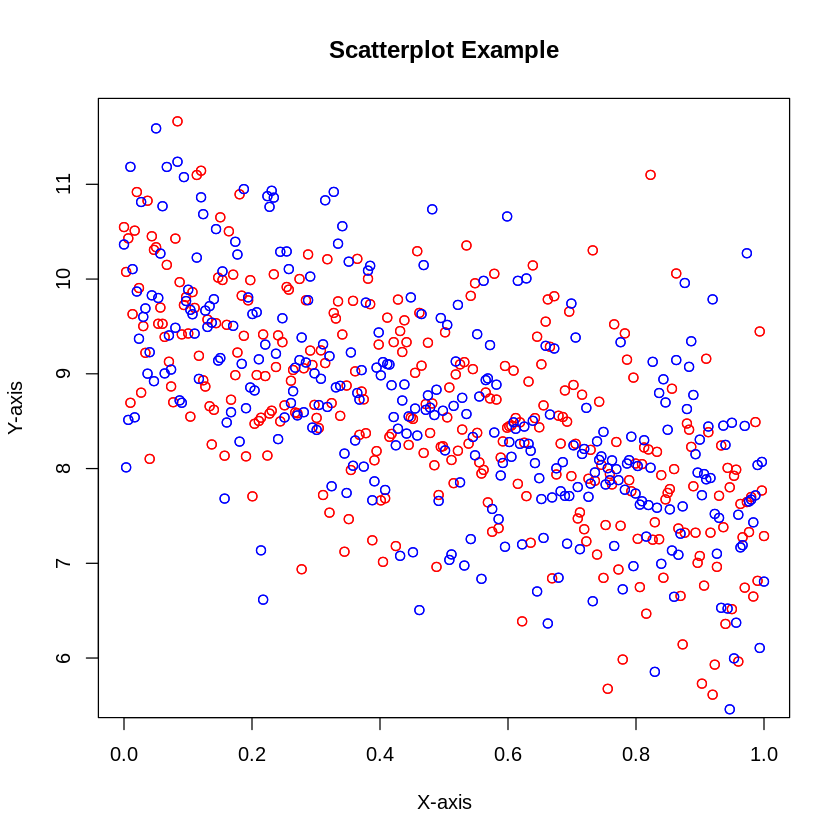

In [25]:
temp <- expr
temp_pseudotime <- pseudotime


substrings_to_filter <- c("Ref")
# Find column indices that start with the specified substring
matching_columns <- grep(paste0("^", substrings_to_filter, collapse = "|"), colnames(temp))
S <- temp[, matching_columns]

matching_names <- grep(paste0("^", substrings_to_filter, collapse = "|"), names(temp_pseudotime), value = TRUE)
S_pseudotime <- temp_pseudotime[matching_names]

substrings_to_filter <- c("Query")
# Find column indices that start with the specified substring
matching_columns <- grep(paste0("^", substrings_to_filter, collapse = "|"), colnames(temp))
T <- temp[, matching_columns]

matching_names <- grep(paste0("^", substrings_to_filter, collapse = "|"), names(temp_pseudotime), value = TRUE)
T_pseudotime <- temp_pseudotime[matching_names]

GENE  = 'Gene1601'
plot(S_pseudotime, S[GENE,], main = "Scatterplot Example", xlab = "X-axis", ylab = "Y-axis", col='red')
points(T_pseudotime, T[GENE,], main = "Scatterplot Example", xlab = "X-axis", ylab = "Y-axis", col='blue')
#plot(Q_time, expr_Q['Gene560',], main = "Scatterplot Example", xlab = "X-axis", ylab = "Y-axis")

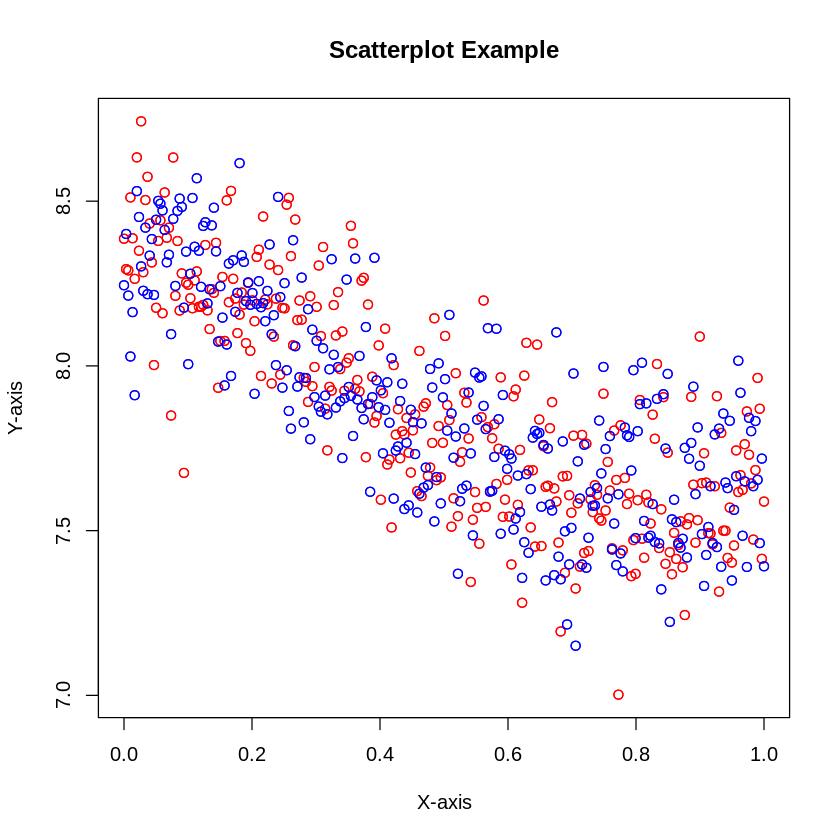

In [26]:

GENE  = 'Gene1607'
plot(S_pseudotime, S[GENE,], main = "Scatterplot Example", xlab = "X-axis", ylab = "Y-axis", col='red')
points(T_pseudotime, T[GENE,], main = "Scatterplot Example", xlab = "X-axis", ylab = "Y-axis", col='blue')
#plot(Q_time, expr_Q['Gene560',], main = "Scatterplot Example", xlab = "X-axis", ylab = "Y-axis")

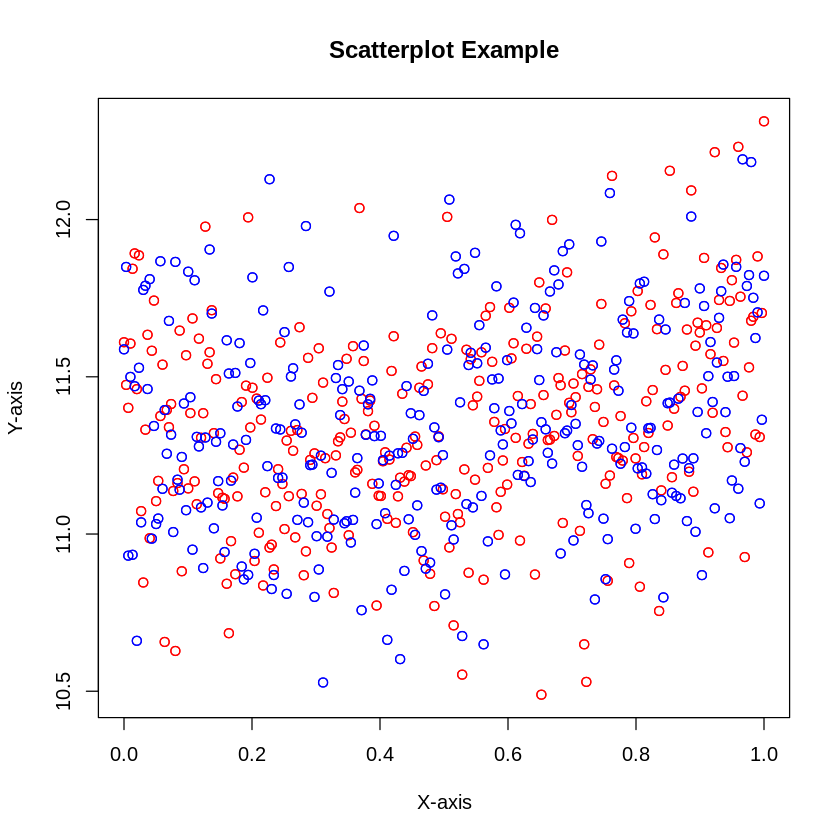

In [27]:

GENE  = 'Gene1542'
plot(S_pseudotime, S[GENE,], main = "Scatterplot Example", xlab = "X-axis", ylab = "Y-axis", col='red')
points(T_pseudotime, T[GENE,], main = "Scatterplot Example", xlab = "X-axis", ylab = "Y-axis", col='blue')
#plot(Q_time, expr_Q['Gene560',], main = "Scatterplot Example", xlab = "X-axis", ylab = "Y-axis")